<b>#-----------------------------------------UCI Cleveland Data source-----------------------------------------------#</b>

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

<b>##################################################Data Collection & Loading#########################################################</b>

In [110]:
#https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv
df = pd.read_csv('heart_uci.csv')
df.head()
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<b>##################################################Data Preparation#########################################################</b>

In [111]:
# Peek Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<b>-------------------------------------Identify Missing Values / Fix Missing Values ----------------------</b>

In [112]:
numeric_vars = df.columns[df.dtypes != 'object']
categorical_vars = df.columns[df.dtypes == 'object']
# List out columns and their counts of missing values - sorted 
print('--------------Numerical Counts of Missing Values ( Sorted ) --------------------')
print(df[numeric_vars].isnull().sum().sort_values(ascending=False))

print('--------------Categorical Counts of Missing Values --------------------')
print(df[categorical_vars].isnull().sum().sort_values(ascending=False))

--------------Numerical Counts of Missing Values ( Sorted ) --------------------
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
--------------Categorical Counts of Missing Values --------------------
Series([], dtype: float64)


<b>------------------------------ Check Data Quality ---------------------------------</b>

In [113]:
# Check Features with Object Type for any Unknown Values

# ? Value needs to be normalized
df['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [114]:
df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

In [66]:
# Convert ? to NAN 
df['ca'].mask(df['ca'] == '?', np.nan, inplace=True)
df['thal'].mask(df['thal'] == '?', np.nan, inplace=True)

<b>---------------------Delete / Impute any Values -----------------------</b>

In [67]:
#Impute Values - vessels
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['ca']])
df['ca'] = imputer.transform(df[['ca']])

#Impute Values - thal
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['thal']])
df['thal'] = imputer.transform(df[['thal']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

<b>----------------------------Labelling Data --------------------------------------</b>

In [53]:
# Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form.
lbl=preprocessing.LabelEncoder()
df['ca'] = lbl.fit_transform(df['ca'])
df['thal'] = lbl.fit_transform(df['thal'])

<b>-----------------Check Data Quality ( Post Imputation & Labelling Data )  ------------------------</b>

In [115]:
# df['vessels'].unique()
# df['thal'].unique()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<b>##################################################Data Exploration#########################################################</b>

<b>--------------------------1. Feature Selection ------------------------------------</b>

In [57]:
# Univariate Selction
# Select Features Variables that identify best performance against a Target Variable  ( Heart Disease Diagnosis ) 
# scikit-learn library provides the SelectKBest class

In [116]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df.copy()
x = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column 

#apply SelectKBest class to extract top best features

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

print(featureScores.nlargest(12,'Score'))  #print best features

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853
6    restecg    2.978271


<b>--------------------------2. Feature Importance ------------------------------------</b>

In [56]:
# the significance of each feature of your dataset, can be integorated using the Model Characteristics property.
# Feature value gives you a score for every function of your results, the higher the score the more significant or appropriate the performance variable is.
# Feature importance is the built-in class that comes with Tree Based Classifiers, we will use the Extra Tree Classifier to extract the top features for the dataset.

[0.07208104 0.05763148 0.1202962  0.05987043 0.06007115 0.02018102
 0.03587333 0.09183868 0.09879871 0.09072433 0.06556093 0.11857139
 0.10850132]


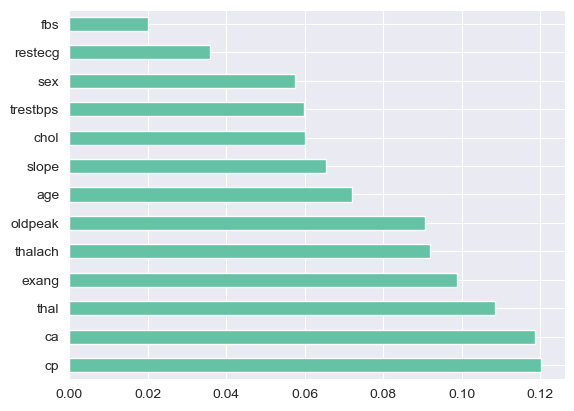

In [117]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

<b>-------------------------------------Relationship between Variables-----------------------------------------</b>

In [ ]:
# Correlation indicates how the features are related to each other or to the target variable.
# The correlation may be positive (increase in one value of the feature increases the value of the target variable) or negative (increase in one value of the feature decreases the value of the target variable)
# Heatmap makes it easy to classify the features are most relevant to the target variable, and we will plot the associated features of the heatmap using the seaborn library.
# Correlation can be positive (increase in one value, the value of the objective variable increases) or negative (increase in one value, the value of the target variable decreased). 
# From this heatmap we can observe that the ‘cp’ chest pain is highly related to the target variable. Compared to relation between other two variables we can say that chest pain contributes the most in prediction of presences of a heart disease. 

<AxesSubplot:>

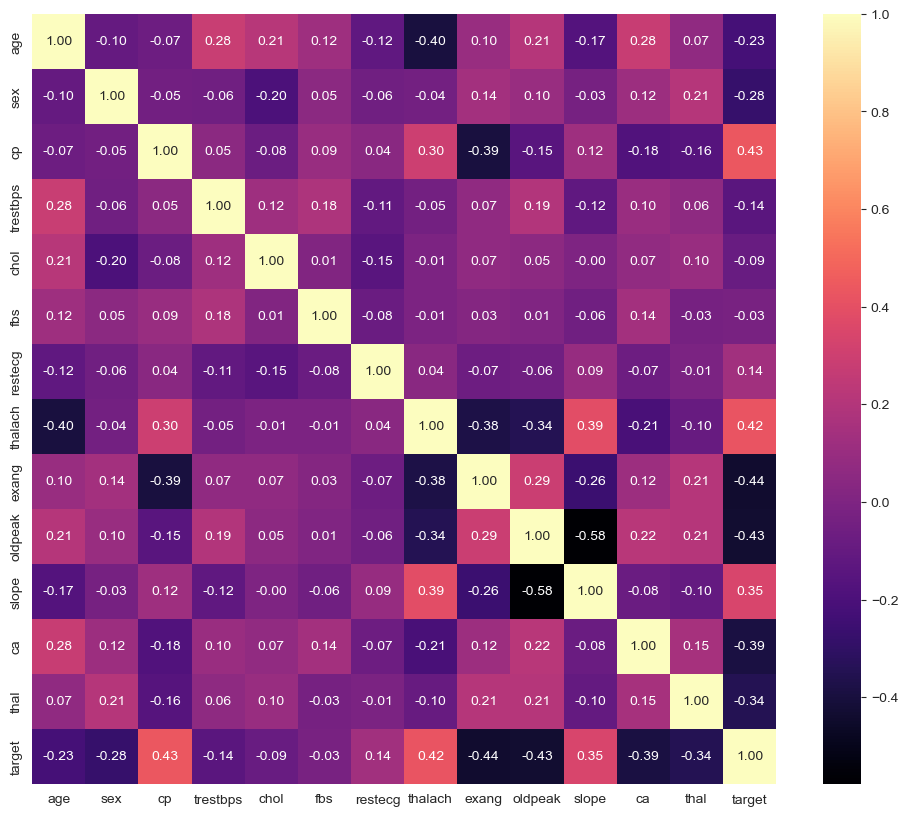

In [118]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

<b>####################################################Data Visualization : ######################################## </b>

<b>==========================Plot Types ============================= </b>
1. <b>CountPlot</b> :  Represent the occurrence(counts) of the observation present in the categorical variable
2. <b>Distplot</b> : Represents the univariate distribution of data i.e. data distribution of a variable against the density distribution

<b>------------------------Set Visualization style -------------------------</b>

In [119]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

<b>------Prepare Data-----------</b>

In [127]:
df2 = df.copy()
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'

<b>------------------------Gender vs Target ------------------------------</b>

Text(0.5, 1.0, 'Gender v/s target\n')

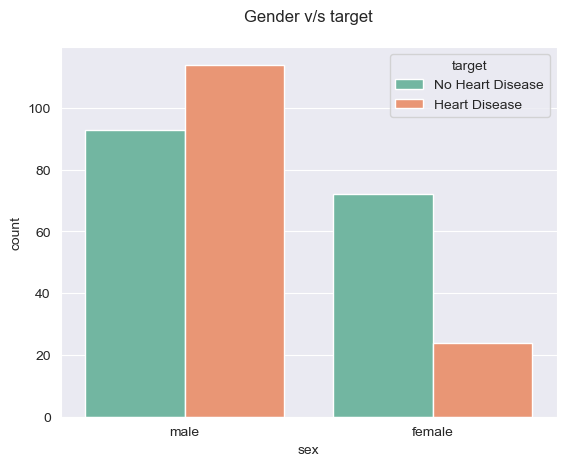

In [128]:
# Sudden Heart Attacks are experienced by men between 70% — 89%.
df2['sex'] = df2['sex'].apply(chng)
df2['target'] = df2['target'].apply(chng2)
sns.countplot(data= df2, x='sex',hue='target')
plt.title('Gender v/s target\n')

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

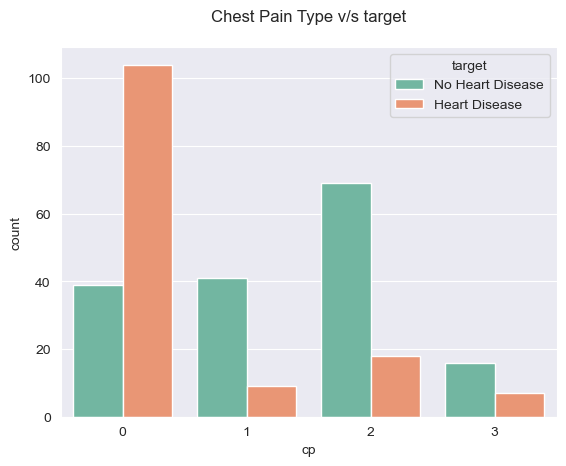

In [130]:
# There are four types of chest pain, asymptomatic, atypical angina, non-anginal pain and typical angina. 
# 1. Most of the Heart Disease patients are found to have asymptomatic chest pain
# 2. Asymptomatic Heart attack puts you at a greater risk of having another heart attack which could be deadly
# 3. If you had asymptomatic attack is by an electrocardiogram or echocardiogram ( R & D - PPG ) 
# 4. group of people might show atypical symptoms like indigestion, flu or a strained chest muscle
# 5. Risk Factors for Asymptomatic Heart Attack : Age/Diabetes/Excess Weight/Family History/High BP/High Cholestorol/Lack of Exercise/Prior Heart Attack/Tobacco Use
sns.countplot(data= df2, x='cp',hue='target')
plt.title('Chest Pain Type v/s target\n')

Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen


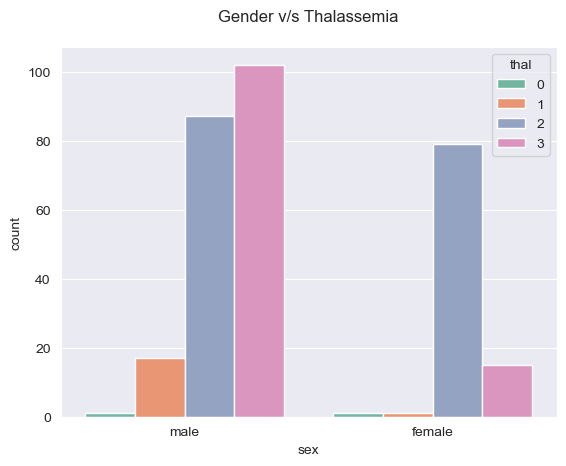

In [131]:
# Gender v/s Thalassemia
# 1. The Beta thalassemia cardiomyopathy is mainly characterized by two distinct pheno types , dilated type : with left ventricular dilatation and impaired contractility and a restrictive pheno type, with restrictive left ventricular feeling , pulmonary hyper tension and right heart failure. 
# 2. Heart problems, congestive heart failures and abnormal heart rhythms can be associated with severe thalassemia.
sns.countplot(data= df2, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')
print('Thalassemia (thal-uh-SEE-me-uh) is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

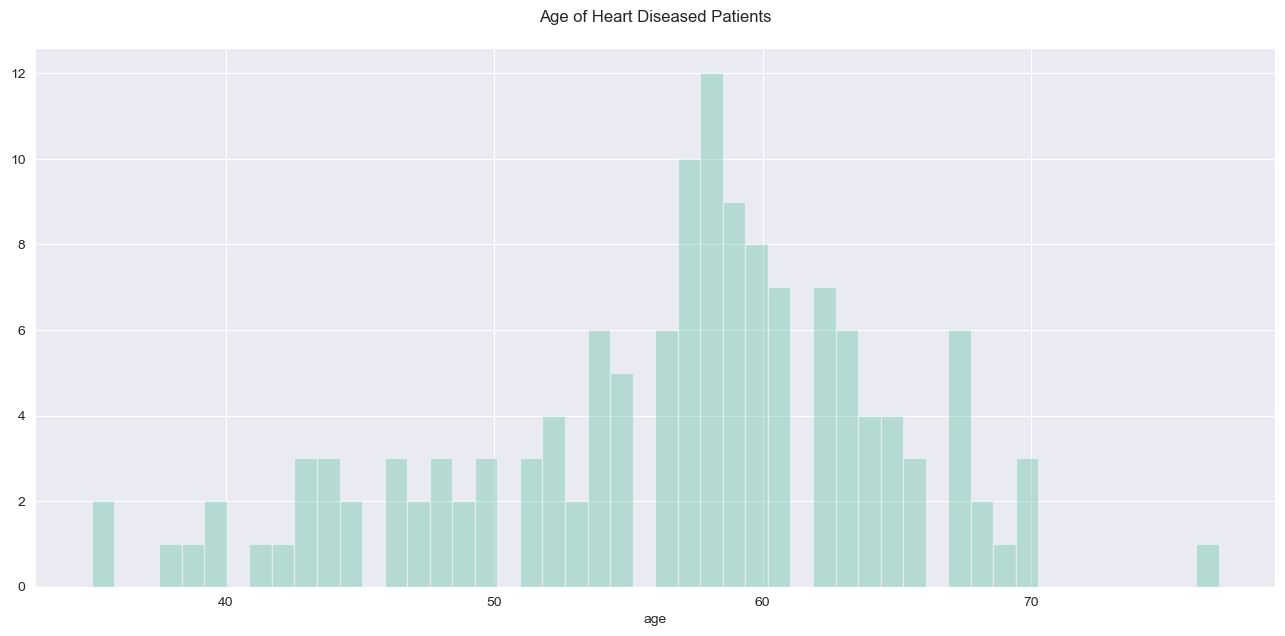

In [132]:
# Distribution of Heart Disease vs Age
# Heart Disease is very common in the seniors which is composed of age group 60 and above and common among adults which belong to the age group of 41 to 60
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

Text(0.5, 1.0, 'Cholestrol Level of Heart Diseased Patients\n')

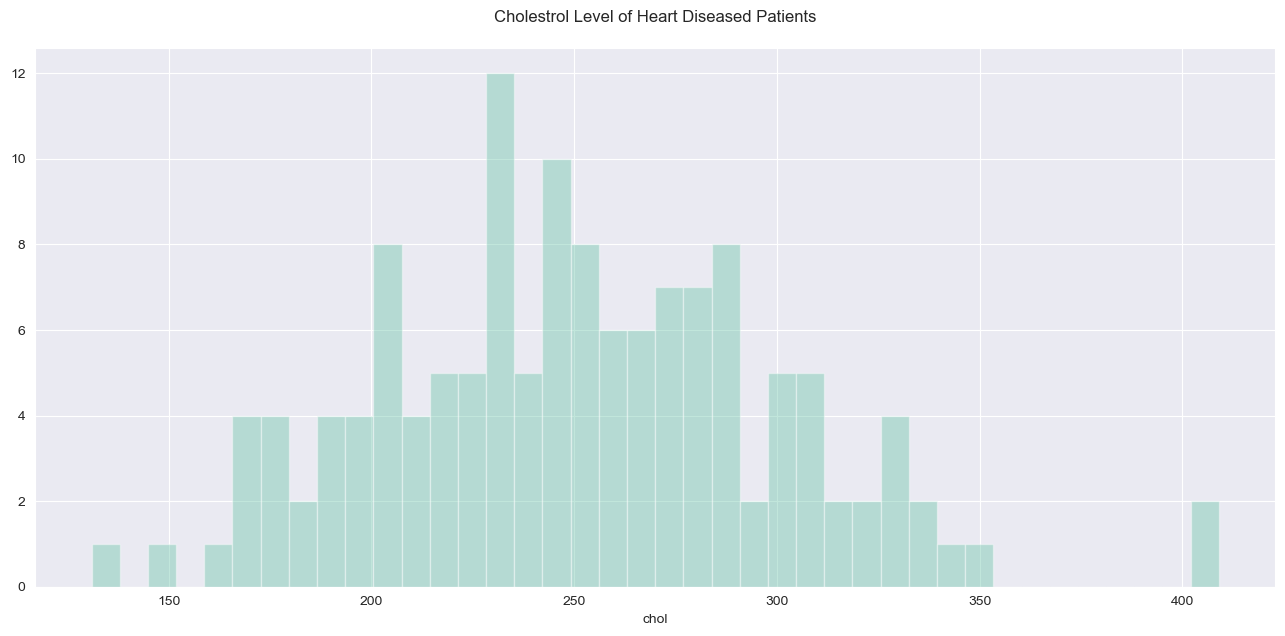

In [135]:
# Distrubition of cholestrol Levels - Heart Disease 
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['chol'],kde=False,bins=40)
plt.title('Cholestrol Level of Heart Diseased Patients\n')

<b>######################################################Data Modeling ##################################################</b>

In [137]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

X = df.iloc[:,0:13] # Features
y = df.iloc[:,13] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7362637362637363
